__Logistic Regression Assumptions__
- Data is free of missing values
- The predictant (target) variable is binary (only accepts two values) or ordinal (categorical variable with ordered values)
- All predictors are independent of each other
- There are at least 50 observations per predictor variable (ensures reliable results) 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [4]:
%matplotlib inline
rcParams['figure.figsize']= 5,4

__Logistic Regression on the titanic dataset__

In [6]:
address = "C:/Users/Josiah/Downloads/Ex_Files_Python_Data_Science_EssT_Pt2/Ex_Files_Python_Data_Science_EssT_Pt2/Exercise Files/Data/titanic-training-data.csv"
titanic_training = pd.read_csv(address)
titanic_training.columns = ['PassengerId', 'Survived', 'PClass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
print(titanic_training)

     PassengerId  Survived  PClass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [7]:
print(titanic_training.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   PClass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


__VARIABLE DESCRIPTIONS__
- Survived - Survival (0 = No; 1 = Yes),
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- SibSp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare (British pound)
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg, France; Q = Queenstown, UK; S = Southampton - Cobh, Ireland)

__Checking that the target variable, Survived, is binary__

<AxesSubplot:xlabel='Survived', ylabel='count'>

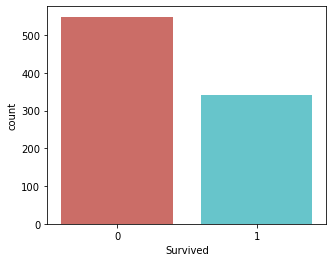

In [8]:
sb.countplot(x='Survived', data=titanic_training, palette='hls')

__Checking for missing values__

In [9]:
titanic_training.isnull().sum() # shows the amount of missing values in the dataset

PassengerId      0
Survived         0
PClass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic_training.describe() # another way to find missing values, but also shows summary stats

,PassengerId,Survived,PClass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


__Dropping missing values__

So let's just go ahead and drop all the variables that aren't relevant for predicting survival. We should at least keep the following:
- Survived - This variable is obviously relevant.
- Pclass - Does a passenger's class on the boat affect their survivability?
- Sex - Could a passenger's gender impact their survival rate?
- Age - Does a person's age impact their survival rate?
- SibSp - Does the number of relatives on the boat (that are siblings or a spouse) affect a person survivability? Probability
- Parch - Does the number of relatives on the boat (that are children or parents) affect a person survivability? Probability
- Fare - Does the fare a person paid effect his survivability? Maybe - let's keep it.
- Embarked - Does a person's point of embarkation matter? It depends on how the boat was filled... Let's keep it.

What about a person's name, ticket number, and passenger ID number? They're irrelavant for predicting survivability. And as you recall, the cabin variable is almost all missing values, so we can just drop all of these.

In [12]:
titanic_data = titanic_training.drop(['Name', 'Ticket', 'Cabin'], axis=1) # axis=1 drops the columns
titanic_data.head()

,PassengerId,Survived,PClass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


__Imputing missing variables__

<AxesSubplot:xlabel='Parch', ylabel='Age'>

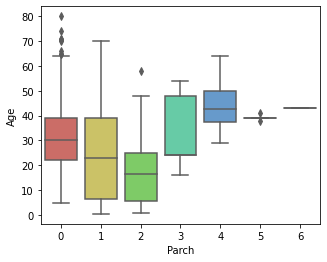

In [13]:
sb.boxplot(x='Parch', y='Age', data=titanic_data, palette='hls')
# shows the number of parents/children an individual has based on their age

In [14]:
Parch_groups = titanic_data.groupby(titanic_data['Parch'])
Parch_groups.mean()
# shows average age of an individual based on the number of parents/children they have onboard

,PassengerId,Survived,PClass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [17]:
def age_approx(cols):
    Age = cols[0]
    Parch = cols[1]
        
    if pd.isnull(Age):
            if Parch == 0:
                return 32
            elif Parch == 1:
                return 24
            elif Parch == 2:
                return 17
            elif Parch == 3:
               return 33
            elif Parch == 4:
                return 45
            else:
                return 30
    else:
        return Age
# defining the function to fill in the missing age values

In [18]:
titanic_data['Age']= titanic_data[['Age', 'Parch']].apply(age_approx, axis=1)
titanic_data.isnull().sum()
# shows that there are no missing age values anymore

PassengerId    0
Survived       0
PClass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [19]:
titanic_data.dropna(inplace=True) # inplace=true updates the dataframe and ensures the changes are SHOWN
titanic_data.reset_index(inplace=True, drop=True)
print(titanic_data.info())
# dropping 'embarked' records with missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   PClass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB
None


__Converting Gender Variable to binary, dummy variable__

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
gender_cat = titanic_data['Sex']
gender_encoded = label_encoder.fit_transform(gender_cat)
gender_encoded[0:5]
# transform

array([1, 0, 0, 0, 1])

In [22]:
titanic_data.head()
# musing .head method and array above to determine that male = 1 and female = 0

,PassengerId,Survived,PClass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [24]:
gender_DF = pd.DataFrame(gender_encoded, columns=['male_gender'])
gender_DF.head()
# creating a dataframe to show the new binary, dummy gender variable

,male_gender
0,1
1,0
2,0
3,0
4,1


In [25]:
embarked_cat = titanic_data['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[0:100]
# converting embarked to a dummy variable - there are 3 embarked locations hence the 0,1,2 options

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2])

In [27]:
# changing the embarked multinomial dummy variable to a binary variable using one-hot encoder
from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories='auto') # categories=auto determines categories automatically from the training data
embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1)) # reshaping as (-1, 1) means we don't know how many rows there will be, so we want sklearn to figure it out. Also means the number of columns will be 1.
embarked_1hot_mat = embarked_1hot.toarray() # .toarray returns an array - tricky, I know
embarked_DF = pd.DataFrame(embarked_1hot_mat, columns= ['C', 'S', 'Q']) # to represent the embarkation locations
embarked_DF.head()

,C,S,Q
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [28]:
titanic_data.drop(['Sex', 'Embarked'], inplace=True, axis=1) # dropping sex and embarked variables since we created binary, dummy versions of them
titanic_data.head() # ensuring sex and embarked variables were dropped as designed

,PassengerId,Survived,PClass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [31]:
# concatenating the new sex and embarked variables to the original titanic dataframe
titanic_dmy = pd.concat([titanic_data, gender_DF, embarked_DF], axis=1, verify_integrity=True).astype(float) # verfy_integrity=True checks whether the new concatenated axis(es) contain duplicates
titanic_dmy[0:5]

,PassengerId,Survived,PClass,Age,SibSp,Parch,Fare,male_gender,C,S,Q
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


__Checking for independence between features__

<AxesSubplot:>

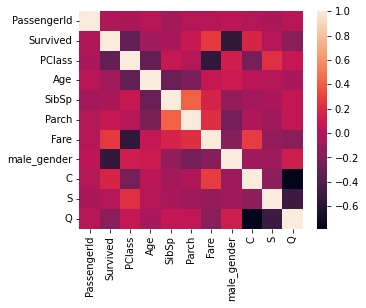

In [32]:
sb.heatmap(titanic_dmy.corr()) # heatmap will show if any independent variables are dependent on each other

In [33]:
# Fare and PClass are not independent of each, so dropping those variables
titanic_dmy.drop(['Fare', 'PClass'], axis=1, inplace=True)
titanic_dmy.head() # ensures Fare and PClass variables were dropped

,PassengerId,Survived,Age,SibSp,Parch,male_gender,C,S,Q
0,1.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


__Checking that dataset size is sufficient__

In [34]:
titanic_dmy.info()
# have at least 50 records for each predictor variable, so dataset is ready to rock

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    float64
 1   Survived     889 non-null    float64
 2   Age          889 non-null    float64
 3   SibSp        889 non-null    float64
 4   Parch        889 non-null    float64
 5   male_gender  889 non-null    float64
 6   C            889 non-null    float64
 7   S            889 non-null    float64
 8   Q            889 non-null    float64
dtypes: float64(9)
memory usage: 62.6 KB


__Breaking up data into training and test groups__

In [38]:
X_train, X_test, y_train, y_test = train_test_split(titanic_dmy.drop('Survived', axis=1),
                                                   titanic_dmy['Survived'], test_size=0.2,
                                                    random_state=200)
# setting the x and y variables and the random state. survived is dropped from the X-variable because X is supposed to represent an independent variable and Y is the target variable, Survived.

In [39]:
print(X_train.shape)
print(y_train.shape) 
# .shape shows the dimensions of the called dataframe - the number of rows and columns in the datafram

(711, 8)
(711,)


In [41]:
X_train[0:5] # getting a feel for the training dataset

,PassengerId,Age,SibSp,Parch,male_gender,C,S,Q
719,721.0,6.0,0.0,1.0,0.0,0.0,0.0,1.0
165,167.0,24.0,0.0,1.0,0.0,0.0,0.0,1.0
879,882.0,33.0,0.0,0.0,1.0,0.0,0.0,1.0
451,453.0,30.0,0.0,0.0,1.0,1.0,0.0,0.0
181,183.0,9.0,4.0,2.0,1.0,0.0,0.0,1.0


In [42]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)
# solver='liblinear' tells sklearn which algorithm to use in the logistic regression
# liblinear is good for smaller datasets and is limited to a one-versus-rest scheme

LogisticRegression(solver='liblinear')

In [43]:
y_pred = LogReg.predict(X_test) # running the actual model

### Model Evaluation

__Classification report without cross-validation__

In [44]:
print(classification_report(y_test, y_pred))
# accuracy metrics show how often the model predicts correctly - roughly 81% across the board

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       109
         1.0       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



__K-fold cross-validation & confusion matrices__

In [45]:
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)
# shows that 377 and 180 are the correct number of predictions - 91 and 63 are the number of incorrect predictions

array([[377,  63],
       [ 91, 180]], dtype=int64)

In [46]:
precision_score(y_train, y_train_pred) #shows the precision of the prediction model -- shows true positives 74% of the time

0.7407407407407407

#### Test Prediction

In [47]:
titanic_dmy[863:864] # choosing a random example passenger

,PassengerId,Survived,Age,SibSp,Parch,male_gender,C,S,Q
863,866.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
test_passenger = np.array([866, 40, 0, 0, 0, 0, 0, 1]).reshape(1, -1) # array includes all the variables as the above example passenger except survived since that's the target variable

print(LogReg.predict(test_passenger))
print(LogReg.predict_proba(test_passenger))
# model predicts test passenger will surive and there is a 73% chance this prediction will be correct

[1.]
[[0.26351831 0.73648169]]
